Analysing the following e-coli landscape under several drugs

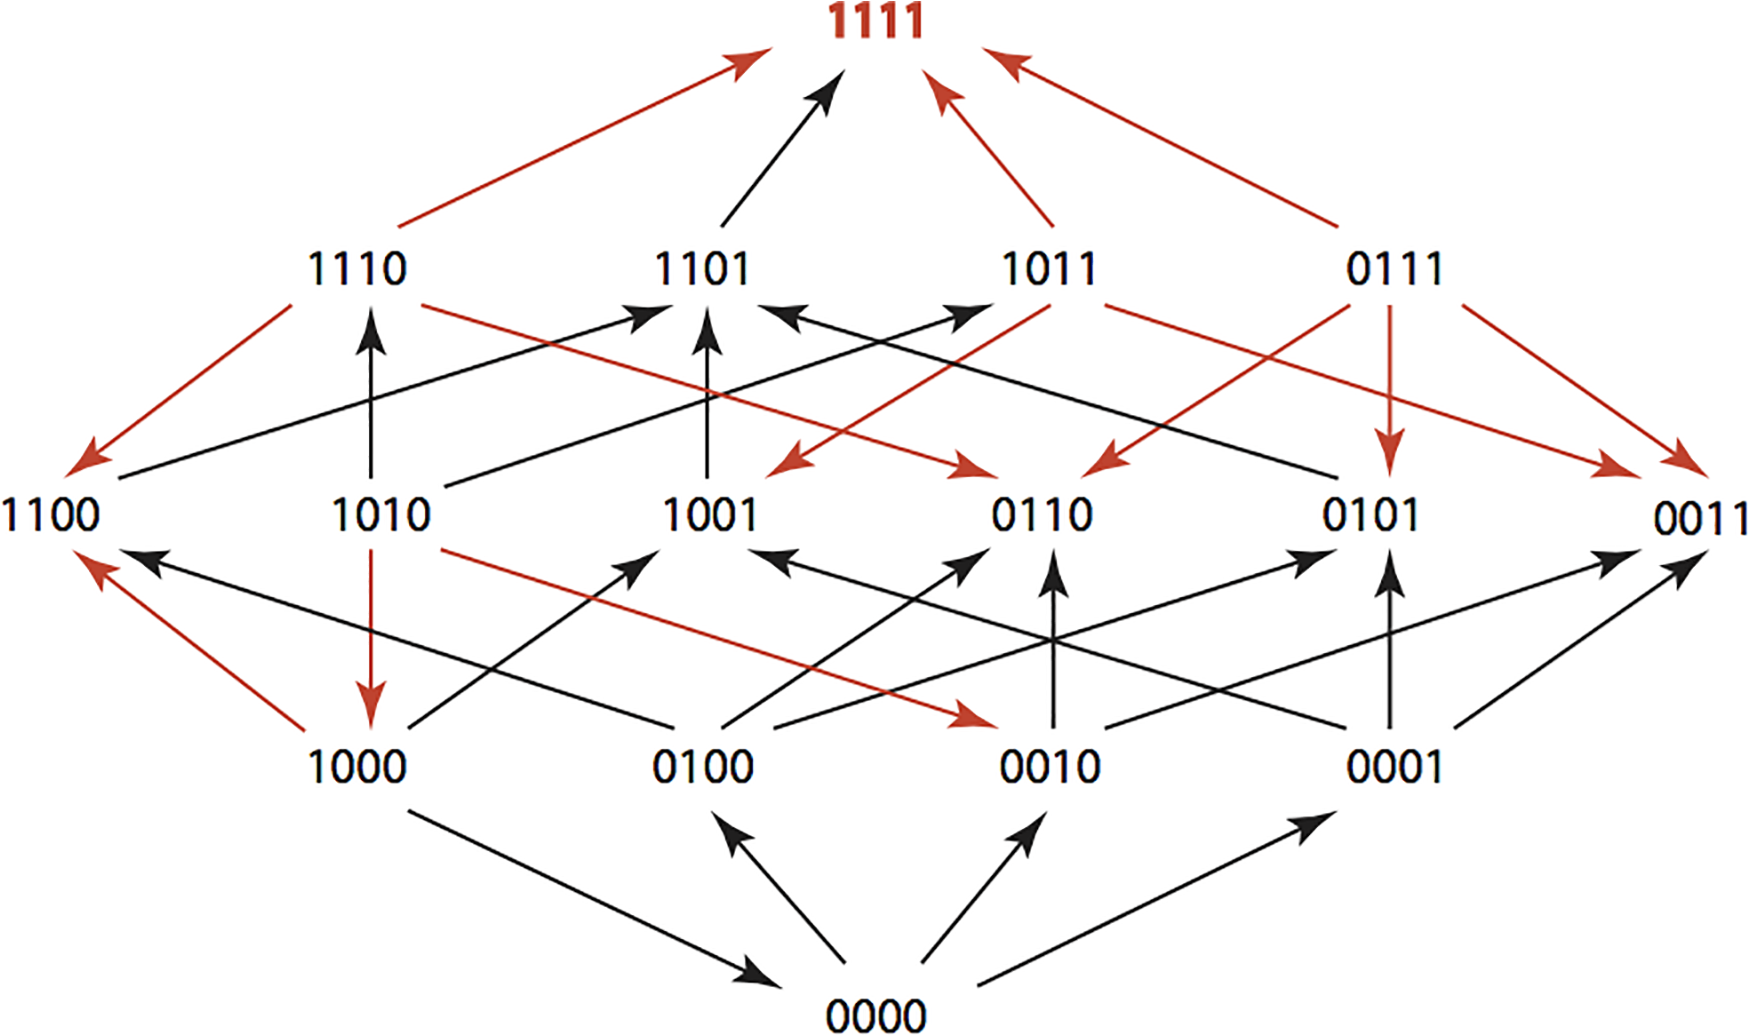

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0122283

In [1]:
from GLCM_functions import *

Complete list of landscapes from the paper

In [7]:
#Simpler landscape test/toy example
f = [0,0.1,0.4,0.9]
f2 = [0.0,0.0,0.31,0.4]
f3 = [0.1,0,0.2,0.3]

print(glcm_landscape_simple(f))

print(glcm_landscape_simple(f2))

print(glcm_landscape_simple(f2))



[0 0 0 2]
[[0 0 0]
 [0 1 1]
 [0 2 1]
 [1 3 1]
 [2 3 1]]
[[0 1 1]
 [0 2 1]
 [1 3 1]
 [2 3 1]]
{'TM': array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 1., 1.]]), 'TM_diff': 2.0, 'energy': 0.5, 'correlation': nan, 'entropy': 0.6931471605599454, 'contrast': 2.0, 'homogeneity': 0.6666666666666666, 'glcm': array([[0.5, 0. , 0.5],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ]])}
[0 0 1 2]
[[0 0 0]
 [0 1 1]
 [0 2 1]
 [1 3 1]
 [2 3 1]]
[[0 1 1]
 [0 2 1]
 [1 3 1]
 [2 3 1]]
{'TM': array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 1., 1.]]), 'TM_diff': 0.0, 'energy': 0.25, 'correlation': 1.0, 'entropy': 1.3862943211198915, 'contrast': 1.5, 'homogeneity': 0.5833333333333333, 'glcm': array([[0.25, 0.25, 0.25],
       [0.  , 0.  , 0.25],
       [0.  , 0.  , 0.  ]])}
[0 0 1 2]
[[0 0 0]
 [0 1 1]
 [0 2 1]
 [1 3 1]
 [2 3 1]]
[[0 1 1]
 [0 2 1]
 [1 3 1]
 [2 3 1]]
{'TM': array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
    

In [8]:
#Generate landscapes
#Flat
f0 = np.repeat(0.5,16).tolist() 
#Flat with one peak
f1 = np.repeat(0.5,15).tolist()+[1]
#Fitness = bitcount (smooth, peak at 1111)
f2 = [bitcount(i) for i in range(16)]
#4-bitcount (smooth, peak at 0000)
f3 = [4-bitcount(i) for i in range(16)]
# peak at 0000 and 1111 (otherwise smooth)
f4 = [abs(2-bitcount(i)) for i in range(16)]

f5 = list(np.random.uniform(-1, 1, size=15))
f5.insert(0,0)

#Three random landscapes
r1=np.random.uniform(0, 2, size=16)                # the initial random vectors
r2=np.random.uniform(0, 2, size=16)
r3=np.random.uniform(0, 2, size=16)  

#fake_landscapes = [f0,f1,f2,f3,f4,f5,r1,r2,r3]

#Labels into dictionary
landscapes_fake = {"f0":f0, "f1":f1, "f2":f2, "f3":f3, "f4":f4, "f5":f5, "r1":r1, "r2":r2,  "r3":r3}
labels_fake = {"f0":"All 0.5", "f1":"All 0.5, one 1", "f2":"1 peak at 1111", "f3":"1 peak at 0000", "f4":"2 peaks at 1111 and 0000", "f5":"Rough Mt. Fuji", "r1":"Random", "r2":"Random",  "r3":"Random"}
drug_group_fake = {"f0":"Constructed", "f1":"Constructed", "f2":"Constructed", "f3":"Constructed", "f4":"Constructed", "f5":"Constructed","r1":"Random", "r2":"Random", "r3": "Random"}

print(landscapes_fake["f5"])

[0, 0.7444545774365814, -0.9458464523337504, -0.7185831987718361, -0.46771588644046025, -0.41570602920036026, 0.22136127859537424, -0.766952601226019, -0.9825446375326274, 0.3367017871670024, 0.288758066037875, 0.35196560096347485, 0.9026262585639457, -0.342148704522369, -0.19759072332675598, 0.5878655437852076]


In [ ]:
#Tunable ruggedness landscape
# TO DO

In [10]:
#Testing binary code (convert genotype to binary string)
x = 16
y = 2
i = 1
b1= x>>i&1
b2 = y>>i&1
print(b1,b2)

'{0:04b}'.format(15)

0 1


'1111'

Landscapes from paper (E-coli drugs)

In [11]:
AMP = [1.851, 2.082, 1.948, 2.434, 2.024, 2.198, 2.033, 0.034, 1.57, 2.165, 0.051, 0.083, 2.186, 2.322, 0.088, 2.821]
AM  = [1.778, 1.782, 2.042, 1.752, 1.448, 1.544, 1.184, 0.063, 1.72, 2.008, 1.799, 2.005, 1.557, 2.247, 1.768, 2.047]
CEC	= [2.258, 1.996, 2.151, 2.648, 2.396, 1.846, 2.23, 0.214, 0.234, 0.172, 2.242, 0.093, 2.15, 0.095, 2.64, 0.516]
CTX = [0.16, 0.085, 1.936, 2.348, 1.653, 0.138, 2.295, 2.269, 0.185, 0.14, 1.969, 0.203, 0.225, 0.092, 0.119, 2.412]
ZOX = [0.993, 0.805, 2.069, 2.683, 1.698, 2.01, 2.138, 2.688, 1.106, 1.171, 1.894, 0.681, 1.116, 1.105, 1.103, 2.591]
CXM = [1.748, 1.7, 2.07, 1.938, 2.94, 2.173, 2.918, 3.272, 0.423, 1.578, 1.911, 2.754, 2.024, 1.678, 1.591, 2.923]
CRO = [1.092, 0.287, 2.554, 3.042, 2.88, 0.656, 2.732, 0.436, 0.83, 0.54, 3.173, 1.153, 1.407, 0.751, 2.74, 3.227]
AMC = [1.435, 1.573, 1.061, 1.457, 1.672, 1.625, 0.073, 0.068, 1.417, 1.351, 1.538, 1.59, 1.377, 1.914, 1.307, 1.728]
CAZ = [2.134, 2.656, 2.618, 2.688, 2.042, 2.756, 2.924, 0.251, 0.288, 0.576, 1.604, 1.378, 2.63, 2.677, 2.893, 2.563]
CTT = [2.125, 1.922, 2.804, 0.588, 3.291, 2.888, 3.082, 3.508, 3.238, 2.966, 2.883, 0.89, 0.546, 3.181, 3.193, 2.543]
SAM = [1.879, 2.533, 0.133, 0.094, 2.456, 2.437, 0.083, 0.094, 2.198, 2.57, 2.308, 2.886, 2.504, 3.002, 2.528, 3.453]
CPR = [1.743, 1.662, 1.763, 1.785, 2.018, 2.05, 2.042, 0.218, 1.553, 0.256, 0.165, 0.221, 0.223, 0.239, 1.811, 0.288]
CPD = [0.595, 0.245, 2.604, 3.043, 1.761, 1.471, 2.91, 3.096, 0.432, 0.388, 2.651, 1.103, 0.638, 0.986, 0.963, 3.268]
TZP = [2.679, 2.906, 2.427, 0.141, 3.038, 3.309, 2.528, 0.143, 2.709, 2.5, 0.172, 0.093, 2.453, 2.739, 0.609, 0.171]
FEP = [2.59, 2.572, 2.393, 2.832, 2.44, 2.808, 2.652, 0.611, 2.067, 2.446, 2.957, 2.633, 2.735, 2.863, 2.796, 3.203]

landscapes = {"AMP":AMP, "AM":AM, "CEC":CEC, "CTX":CTX, "ZOX":ZOX, "CXM":CXM, "CRO":CRO, "AMC":AMC, "CAZ":CAZ, "CTT":CTT, "SAM":SAM, "CPR":CPR, "CPD":CPD, "TZP":TZP, "FEP":FEP}

drug_group = {"AMP":"Aminopenicillin", "AM":"Aminopenicillin", "CEC":"Cephalosporin", "CTX":"Cephalosporin", "ZOX":"Cephalosporin", "CXM":"Cephalosporin", "CRO":"Cephalosporin", "AMC":"Penicillin+BetaLactamase", "CAZ":"Cephalosporin", "CTT":"Cephalosporin", "SAM":"Penicillin+BetaLactamase", "CPR":"Cephalosporin", "CPD":"Cephalosporin", "TZP":"Penicillin+BetaLactamase", "FEP":"Cephalosporin"}

for key in landscapes:
    print(key)

AMP
AM
CEC
CTX
ZOX
CXM
CRO
AMC
CAZ
CTT
SAM
CPR
CPD
TZP
FEP


Hamming distance function

Convert landscapes by scaling and binarising

In [12]:
#Testing scaling
lscp = landscapes_fake["r1"]

lscp_scale = np.interp(lscp, (min(lscp), max(lscp)), (0, +1))

scale= [0,1/4,2/4,3/4,4/4]

inds = np.digitize(lscp_scale,scale)
inds = inds-1

print(lscp_scale)

#connections = [(0,1), (0,2), (0,3), (0,4)]



[0.46478116 1.         0.46330417 0.9228197  0.28060154 0.03641751
 0.48383187 0.72611516 0.895666   0.         0.98154015 0.23693831
 0.78727075 0.76713913 0.52427653 0.01004083]


In [13]:
def glcm_landscape(key, lscp, drug_group, normalise="TRUE"):
    lscp_scale = np.interp(lscp, (min(lscp), max(lscp)), (0, +1))
    scale= [0,1/4,2/4,3/4,4/4]
    inds = np.digitize(lscp_scale,scale)
    inds = inds-1
    peaks = sum(inds==4)
    
    hammy = np.array([0,0,0]) #generate neighbours
    for i in range(0,len(lscp)):
        for j in range(i,len(lscp)):
            ob1 = Solution()
            ham = ob1.hammingDistance(i,j)
            if ob1.hammingDistance(i,j)==1:
                hammy=np.vstack([hammy, [i, j, ham]])
            
    #print(hammy)
    hammy = np.delete(hammy, (0), axis=0)
    hist = np.zeros((len(scale),len(scale)))

    for row in hammy:
        x,y,z=row
        hist[inds[x], inds[y]]=hist[inds[x], inds[y]]+1
    
    if (normalise=="TRUE"):
        hist = hist/(np.sum(hist))
    
    energy = np.sum(hist*hist)
    entropy=0
    contrast=0
    homogeneity=0
    myDict = {}
    for i in range(0, len(scale)):
        for j in range(0, len(scale)):
            entropy = entropy - hist[i,j]*np.log(hist[i,j]+0.00000001)
            contrast = contrast + (i-j)*(i-j)*hist[i,j]
            homogeneity = homogeneity + hist[i,j]/(1+abs(i-j))
    
    myDict = {"peaks":peaks,"group":drug_group[key],"energy":energy, "entropy":entropy,"contrast":contrast, "homogeneity":homogeneity}
    #return(energy, entropy, contrast, homogeneity)
    return(myDict)
       


Test out hamming distance between binary strings to find connected components

In [14]:
hammy = np.array([0,0,0])
for i in range(0,len(AMP)):
    for j in range(i,len(AMP)):
        ob1 = Solution()
        ham = ob1.hammingDistance(i,j)
        if ob1.hammingDistance(i,j)==1:
            hammy=np.vstack([hammy, [i, j, ham]])
            
print(hammy)
       

[[ 0  0  0]
 [ 0  1  1]
 [ 0  2  1]
 [ 0  4  1]
 [ 0  8  1]
 [ 1  3  1]
 [ 1  5  1]
 [ 1  9  1]
 [ 2  3  1]
 [ 2  6  1]
 [ 2 10  1]
 [ 3  7  1]
 [ 3 11  1]
 [ 4  5  1]
 [ 4  6  1]
 [ 4 12  1]
 [ 5  7  1]
 [ 5 13  1]
 [ 6  7  1]
 [ 6 14  1]
 [ 7 15  1]
 [ 8  9  1]
 [ 8 10  1]
 [ 8 12  1]
 [ 9 11  1]
 [ 9 13  1]
 [10 11  1]
 [10 14  1]
 [11 15  1]
 [12 13  1]
 [12 14  1]
 [13 15  1]
 [14 15  1]]


In [15]:
#Print statements here just for testing purposes

nestedDict = {}
for key in landscapes:
    print(key)
    print(landscapes[key])
    nestedDict[key] = glcm_landscape(key, landscapes[key], drug_group)
    print(glcm_landscape(key, landscapes[key], drug_group))


#glcm_landscape(AMP)
#glcm_landscape(AM)
#glcm_landscape(CEC)

scale= [0,2/6,4/6,6/6,8/6, 10/6, 12/6]

nestedDict_fake = {}
for key in landscapes_fake:
    print(key)
    print(landscapes_fake[key])
    nestedDict_fake[key] = glcm_landscape_scale(key, landscapes_fake[key], labels_fake, scale)
    print(glcm_landscape_scale(key, landscapes_fake[key], labels_fake, scale))

df_fake = pd.DataFrame(nestedDict_fake)

df_fake = df_fake.T
#glcm_landscape(AMP)
#glcm_landscape(AM)

AMP
[1.851, 2.082, 1.948, 2.434, 2.024, 2.198, 2.033, 0.034, 1.57, 2.165, 0.051, 0.083, 2.186, 2.322, 0.088, 2.821]
{'peaks': 1, 'group': 'Aminopenicillin', 'energy': 0.16015625, 'entropy': 1.9358475650314302, 'contrast': 3.6875, 'homogeneity': 0.5838541666666667}
AM
[1.778, 1.782, 2.042, 1.752, 1.448, 1.544, 1.184, 0.063, 1.72, 2.008, 1.799, 2.005, 1.557, 2.247, 1.768, 2.047]
{'peaks': 1, 'group': 'Aminopenicillin', 'energy': 0.259765625, 'entropy': 1.7900904774754642, 'contrast': 1.3125, 'homogeneity': 0.7447916666666666}
CEC
[2.258, 1.996, 2.151, 2.648, 2.396, 1.846, 2.23, 0.214, 0.234, 0.172, 2.242, 0.093, 2.15, 0.095, 2.64, 0.516]
{'peaks': 1, 'group': 'Cephalosporin', 'energy': 0.162109375, 'entropy': 2.02737681770821, 'contrast': 3.5625, 'homogeneity': 0.6557291666666667}
CTX
[0.16, 0.085, 1.936, 2.348, 1.653, 0.138, 2.295, 2.269, 0.185, 0.14, 1.969, 0.203, 0.225, 0.092, 0.119, 2.412]
{'peaks': 1, 'group': 'Cephalosporin', 'energy': 0.189453125, 'entropy': 1.8970944478298613, 'c

/home/steph/ScottLab/GLCMfitness/GLCM_functions.py:377: RuntimeWarning: invalid value encountered in double_scalars
  correlation = correlation + hist[i,j]*(i-mu)*(j-mu)/var


Text(0.5, 0, 'Entropy')

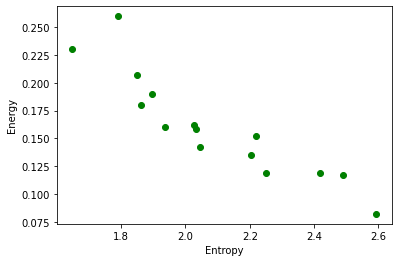

In [16]:
#Dictionary version
landscapes["AM"]

for data_dict in nestedDict.values():
    x = data_dict["entropy"]
    y = data_dict["energy"]
    plt.scatter(x,y, color="green")
    #sns.scatterplot(x,y)

    
plt.ylabel("Energy")
plt.xlabel("Entropy")


In [17]:
#pandas conversion of dictionaries

df = pd.DataFrame(nestedDict)

df = df.T

df_fake = pd.DataFrame(nestedDict_fake)

df_fake = df_fake.T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


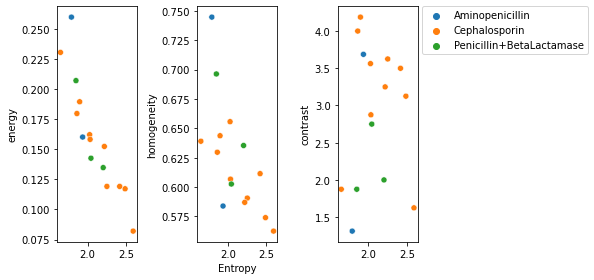

In [18]:
#Seaborn plot

fig, axs = plt.subplots(ncols=3)
sns.scatterplot(x='entropy', y='energy', hue="group", data=df, ax=axs[0])
sns.scatterplot(x='entropy', y='homogeneity', hue="group", data=df, ax=axs[1])
sns.scatterplot(x='entropy',y='contrast', hue="group", data=df, ax=axs[2])
#plt.xlabel("Entropy")
#sns.scatterplot( x="energy", y="entropy", data=df, hue="contrast")
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()
axs[0].set_xlabel("")
axs[1].set_xlabel('Entropy')
axs[2].set_xlabel('')
handles, labels = axs[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('energy_entropy.eps', format='eps', dpi=300)

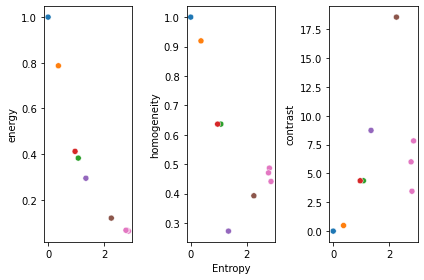

In [19]:
#Seaborn plot


fig, axs = plt.subplots(ncols=3)
#labels = axs.get_legend_handles_labels() 
#axs.legend(handles[:0], labels[:0])
sns.scatterplot(x='entropy', y='energy', hue="group", data=df_fake, ax=axs[0])
sns.scatterplot(x='entropy', y='homogeneity', hue="group", data=df_fake, ax=axs[1])
sns.scatterplot(x='entropy',y='contrast', hue="group", data=df_fake, ax=axs[2])
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()
axs[0].set_xlabel("")
axs[1].set_xlabel('Entropy')
axs[2].set_xlabel('')

handles, labels = axs[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.)
plt.tight_layout()

#xlabel("Entropy")
#sns.scatterplot( x="energy", y="entropy", data=df, hue="contrast")
plt.savefig('energy_entropy_fake.eps', format='eps', dpi=300)

{'mu': 4.0, 'var': 4.7272727272727275, 'peaks': 0, 'correlation': 0.4615384615384615, 'group': '1 peak at 1111', 'energy': 0.38292011019283745, 'entropy': 1.0805839821400562, 'contrast': 4.363636363636363, 'homogeneity': 0.6363636363636364}


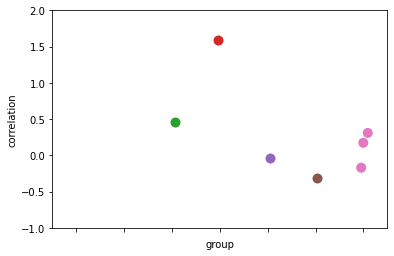

In [20]:
fig = sns.stripplot(x='group', y='correlation', hue="group", data=df_fake, size=10)
fig.get_legend().remove()
fig.set(xticklabels=[])
fig.set_ylim([-1,2])

print(nestedDict_fake["f2"])

Try different scaling (don't scale to each landscape)

In [21]:
#scale= [0,2/6,4/6,6/6,8/6,10/6]
scale= [0,2/4,4/4,6/4,8/4]
nestedDict_unscale = {}
for key in landscapes:
    print(key)
    print(landscapes[key])
    nestedDict_unscale[key] = glcm_landscape_scale(key, landscapes[key], drug_group, scale)
    print(glcm_landscape_scale(key, landscapes[key], drug_group, scale))



AMP
[1.851, 2.082, 1.948, 2.434, 2.024, 2.198, 2.033, 0.034, 1.57, 2.165, 0.051, 0.083, 2.186, 2.322, 0.088, 2.821]
{'mu': 3.0606060606060606, 'var': 1.8751147842056932, 'peaks': 0, 'correlation': -0.01860920666013713, 'group': 'Aminopenicillin', 'energy': 0.19375573921028466, 'entropy': 1.776445635619683, 'contrast': 5.575757575757576, 'homogeneity': 0.6212121212121212}
AM
[1.778, 1.782, 2.042, 1.752, 1.448, 1.544, 1.184, 0.063, 1.72, 2.008, 1.799, 2.005, 1.557, 2.247, 1.768, 2.047]
{'mu': 2.9696969696969693, 'var': 0.6354453627180899, 'peaks': 0, 'correlation': 0.1921965317919076, 'group': 'Aminopenicillin', 'energy': 0.1680440771349862, 'entropy': 2.041229979885027, 'contrast': 1.6969696969696968, 'homogeneity': 0.6777777777777777}
CEC
[2.258, 1.996, 2.151, 2.648, 2.396, 1.846, 2.23, 0.214, 0.234, 0.172, 2.242, 0.093, 2.15, 0.095, 2.64, 0.516]
{'mu': 2.878787878787879, 'var': 2.773186409550046, 'peaks': 0, 'correlation': 0.2880794701986755, 'group': 'Cephalosporin', 'energy': 0.1790

In [22]:
df_unscale = pd.DataFrame(nestedDict_unscale)

df_unscale = df_unscale.T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


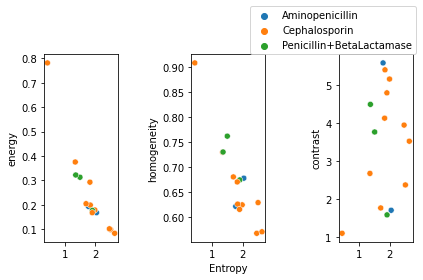

In [23]:
#Seaborn plot

fig, axs = plt.subplots(ncols=3)
sns.scatterplot(x='entropy', y='energy', hue="group", data=df_unscale, ax=axs[0])
sns.scatterplot(x='entropy', y='homogeneity', hue="group", data=df_unscale, ax=axs[1])
sns.scatterplot(x='entropy',y='contrast', hue="group", data=df_unscale, ax=axs[2])
#plt.xlabel("Entropy")
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()
axs[0].set_xlabel("")
axs[1].set_xlabel('Entropy')
axs[2].set_xlabel('')

handles, labels = axs[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.)
plt.tight_layout()
#sns.scatterplot( x="energy", y="entropy", data=df, hue="contrast")
plt.savefig('energy_entropy_unscaled.eps', format='eps', dpi=300)

/home/steph/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-24-b3230e7068a2>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


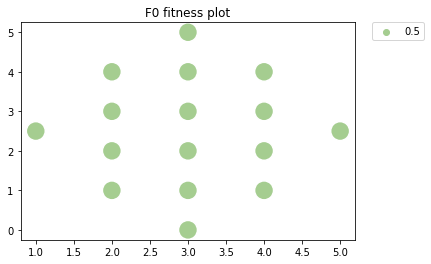

In [24]:
#Example of fitness plot 
y=2.5
#values_m = [0,1,2,3,4,5,6,7,8,9,x,x,x,x,x,x]
x_points = [1,2,2,3,2,3,3,4,2,3,3,4,3,4,4,5]
y_points = [y,4,3,5,2,4,2,4,1,3,1,3,0,2,1,y]

fig = plt.figure()
ax = fig.add_subplot(111)
#x_points = [1,2,2,2,2,3,3,3,3,3,3,4,4,4,4,5]
#y_points = [2.5,1,2,3,4,0,1,2,3,4,5,1,2,3,4,2.5]
sns.scatterplot(x_points, y_points, hue=landscapes_fake["f0"], s=360, palette="crest", legend="full")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('F0 fitness plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.show()

In [25]:
def plot_fitness(landscape):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    y=2.5
    labels = [int_to_binary(x) for x in range(0,16)]
    x_points = [1,2,2,3,2,3,3,4,2,3,3,4,3,4,4,5]
    y_points = [y,4,3,5,2,4,2,4,1,3,1,3,0,2,1,y]
    sns.scatterplot(x_points, y_points, hue=landscape, s=1000, palette="crest", legend="full")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('Fitness plot')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    fig.show()
    
    for x, y,z  in zip(x_points, y_points, labels):
        plt.text(x = x-0.15, # x-coordinate position of data label
                 y = y-0.1, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = z, # data label, formatted to ignore decimals
                 color = 'white') # set colour of line

In [26]:
# label points on the plot
y=2.5
values_m = range(0,16)
x_points = [1,2,2,3,2,3,3,4,2,3,3,4,3,4,4,5]
y_points = [y,4,3,5,2,4,2,4,1,3,1,3,0,2,1,y]

labels = [int_to_binary(x) for x in values_m]




[0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4]
f0
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
f1
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1]
f2
[0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4]
f3
[4, 3, 3, 2, 3, 2, 2, 1, 3, 2, 2, 1, 2, 1, 1, 0]


/home/steph/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-25-3c8d73a7b7d1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/steph/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-25-3c8d73a7b7d1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so c

f4
[2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2]
f5
[0, 0.7444545774365814, -0.9458464523337504, -0.7185831987718361, -0.46771588644046025, -0.41570602920036026, 0.22136127859537424, -0.766952601226019, -0.9825446375326274, 0.3367017871670024, 0.288758066037875, 0.35196560096347485, 0.9026262585639457, -0.342148704522369, -0.19759072332675598, 0.5878655437852076]
r1
[0.97486259 1.97198985 0.9721109  1.82820085 0.63173094 0.17680943
 1.01035458 1.46173493 1.77761277 0.10896262 1.93759865 0.55038515
 1.57566947 1.53816371 1.08570407 0.12766897]


<ipython-input-25-3c8d73a7b7d1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/steph/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-25-3c8d73a7b7d1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/steph/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

r2
[0.62786397 1.26157861 1.00290363 1.49795781 0.32486062 0.70768973
 0.28914086 1.12956214 1.97195171 1.07906677 1.22359837 1.9322456
 1.37747367 1.72602276 1.1836796  1.49092774]
r3
[0.08012595 1.32955544 1.11015373 0.10794955 1.67094713 0.43961002
 1.11237472 0.80781251 0.08735212 0.66140796 0.96410727 0.31420227
 1.99640568 0.85867975 1.67186168 1.75668106]


<ipython-input-25-3c8d73a7b7d1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/steph/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-25-3c8d73a7b7d1>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


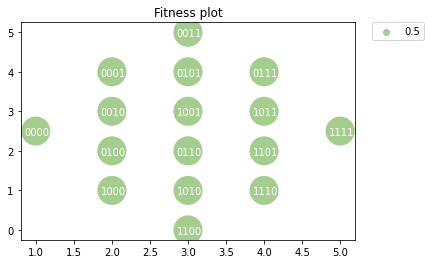

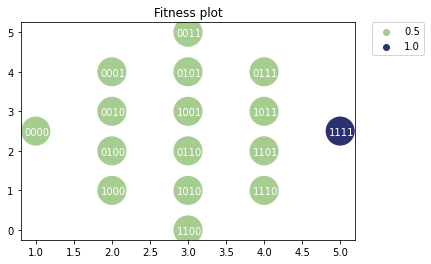

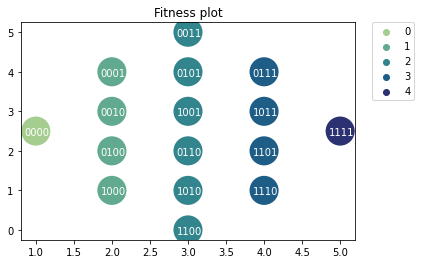

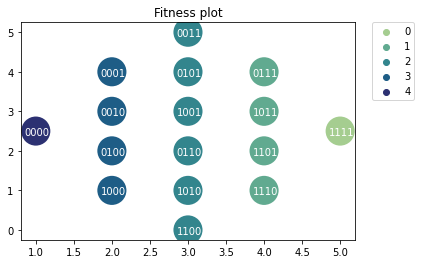

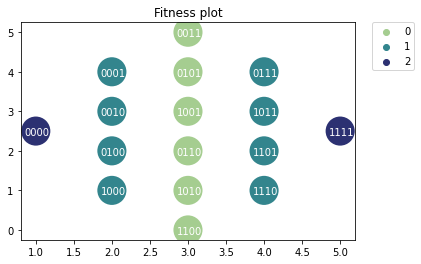

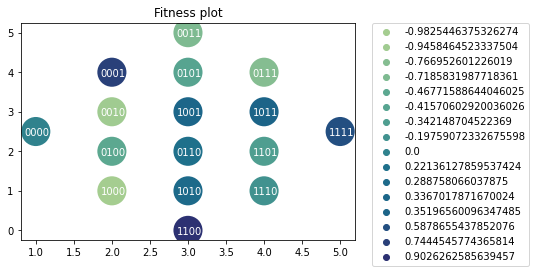

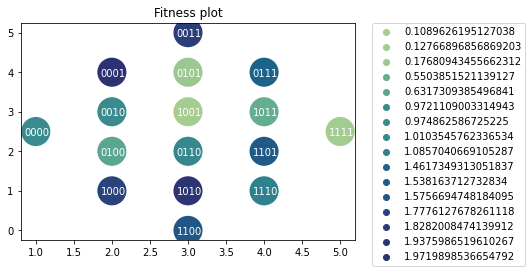

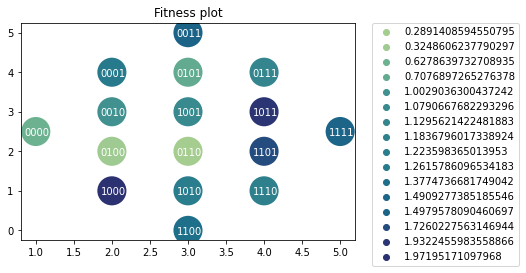

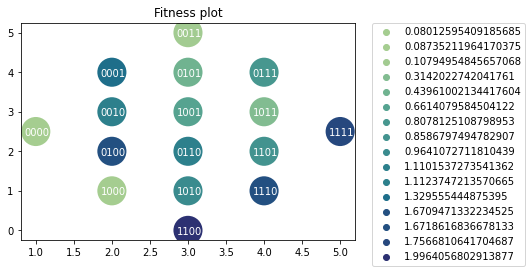

In [27]:
print(landscapes_fake["f2"])
for key in landscapes_fake:
    print(key)
    print(landscapes_fake[key])
    plot_fitness(landscapes_fake[key])